In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Define input shape
input_shape = (128, 128, 3)  # For 128x128 RGB images

In [4]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes: speed, direction, other
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,529,283 (120.27 MB)

 Trainable params: 31,529,283 (120.27 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Data Preprocessing
import os
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [6]:
CLASSES = ['speed', 'direction', 'other']

# Load train dataset
def load_data(data_path, img_height, img_width, classes):
    images = []
    labels = []
    for idx, class_name in enumerate(classes):
        class_path = os.path.join(data_path, 'Train', class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = load_img(img_path, target_size=(img_height, img_width))
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(idx)
    return np.array(images), np.array(labels)

In [7]:
X_train, y_train = load_data(path, 128, 128, CLASSES)

In [8]:
# Split train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
# One-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(Y_train, num_classes=3)
y_test = to_categorical(Y_test, num_classes=3)

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 230s 7s/step - accuracy: 0.3464 - loss: 1.0962 - val_accuracy: 0.4310 - val_loss: 1.0618
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 204s 6s/step - accuracy: 0.4993 - loss: 1.0586 - val_accuracy: 0.6109 - val_loss: 1.0127
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 0.5452 - loss: 1.0079 - val_accuracy: 0.6987 - val_loss: 0.9731
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.6276 - loss: 0.9649 - val_accuracy: 0.7155 - val_loss: 0.9358
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.6909 - loss: 0.9188 - val_accuracy: 0.7448 - val_loss: 0.9015
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - accuracy: 0.6794 - loss: 0.8772 - val_accuracy: 0.7866 - val_loss: 0.8703
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - accuracy: 0.7021 - loss: 0.8521 - val_accuracy: 0.7782 - val_loss: 0.8430
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.7243 - loss: 0.8223 - val_accuracy: 0.7782 - v

In [11]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [12]:
# Predictions on the test set
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


Confusion Matrix


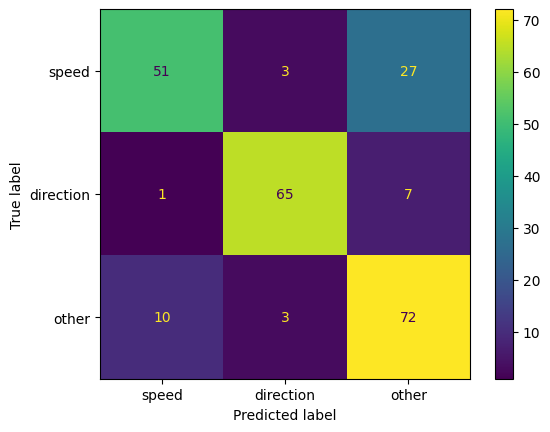

In [13]:
# Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot()

In [19]:
# Classification Report
print('Classification Report')
print(classification_report(Y_test, Y_pred, target_names=CLASSES))

Classification Report
              precision    recall  f1-score   support

       speed       0.82      0.63      0.71        81
   direction       0.92      0.89      0.90        73
       other       0.68      0.85      0.75        85

    accuracy                           0.79       239
   macro avg       0.81      0.79      0.79       239
weighted avg       0.80      0.79      0.79       239

